In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [31]:
df_train = pd.read_csv('./dataset/PSM/train.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='timestamp_(min)'
                   )

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132481 entries, 0.0 to 132480.0
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   feature_0   132481 non-null  float64
 1   feature_1   132481 non-null  float64
 2   feature_2   132481 non-null  float64
 3   feature_3   132481 non-null  float64
 4   feature_4   132279 non-null  float64
 5   feature_5   132232 non-null  float64
 6   feature_6   131918 non-null  float64
 7   feature_7   132434 non-null  float64
 8   feature_8   132434 non-null  float64
 9   feature_9   132481 non-null  float64
 10  feature_10  132434 non-null  float64
 11  feature_11  132481 non-null  float64
 12  feature_12  132481 non-null  float64
 13  feature_13  132232 non-null  float64
 14  feature_14  132279 non-null  float64
 15  feature_15  132481 non-null  float64
 16  feature_16  132481 non-null  float64
 17  feature_17  132481 non-null  float64
 18  feature_18  132279 non-null  float64
 19  fea

In [2]:
df_test = pd.read_csv('./dataset/PSM/test.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='timestamp_(min)'
                   )

In [3]:
df_test_label = pd.read_csv('./dataset/PSM/test_label.csv',
                            index_col='timestamp_(min)'
                            )

In [4]:
df_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
timestamp_(min),,,,,,,,,,,,,,,,,,,,,
132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,0.478078,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,0.494367,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,0.484878,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,0.488316,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,0.487094,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87841 entries, 132480.0 to 220320.0
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   87841 non-null  float64
 1   feature_1   87841 non-null  float64
 2   feature_2   87841 non-null  float64
 3   feature_3   87841 non-null  float64
 4   feature_4   87841 non-null  float64
 5   feature_5   87841 non-null  float64
 6   feature_6   87841 non-null  float64
 7   feature_7   87841 non-null  float64
 8   feature_8   87841 non-null  float64
 9   feature_9   87841 non-null  float64
 10  feature_10  87841 non-null  float64
 11  feature_11  87841 non-null  float64
 12  feature_12  87841 non-null  float64
 13  feature_13  87841 non-null  float64
 14  feature_14  87841 non-null  float64
 15  feature_15  87841 non-null  float64
 16  feature_16  87841 non-null  float64
 17  feature_17  87841 non-null  float64
 18  feature_18  87841 non-null  float64
 19  feature_19  87841 no

In [6]:
df_test_label.head()

,label
timestamp_(min),
132480.0,0
132481.0,0
132482.0,0
132483.0,0
132484.0,0


In [7]:
df_test_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87841 entries, 132480.0 to 220320.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   87841 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [8]:
df_test_label.describe()

,label
count,87841.000000
mean,0.277558
std,0.447797
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
count_of_ones = (df_test_label['label'] == 1).sum()
count_of_zeros = (df_test_label['label'] == 0).sum()

print(f'Number of 1s: {count_of_ones}')
print(f'Number of 0s: {count_of_zeros}')


Number of 1s: 24381
Number of 0s: 63460


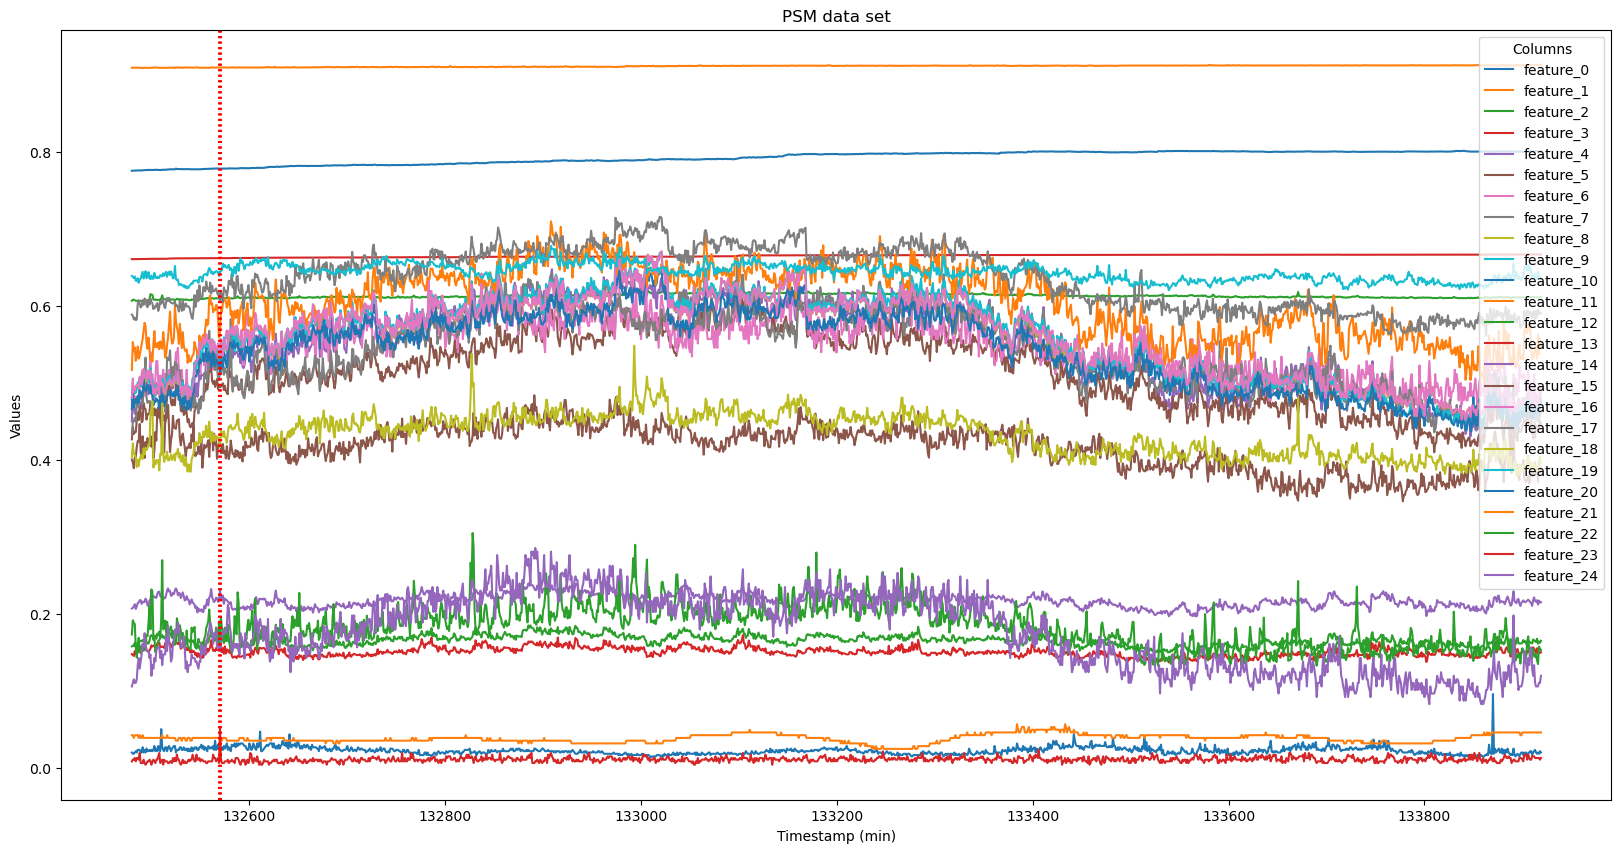

In [10]:
x = 60*24
df_test_subset = df_test.head(x)
df_test_label_subset = df_test_label.head(x)



# Plot all columns in one plot
df_test_subset.plot(figsize=(20, 10), linestyle='-')
#df_test_label_subset['label'].plot(linestyle='-', label='label', color='red')
# Plot a vertical line when the label is 1
for timestamp, label in zip(df_test_label_subset.index, df_test_label_subset['label']):
    if label == 1:
        plt.axvline(x=timestamp, color='red', linestyle=':')

# Customize the plot (optional)
plt.title('PSM data set')
plt.xlabel('Timestamp (min)')
plt.ylabel('Values')
plt.legend(title='Columns')

# Show the plot
plt.show()

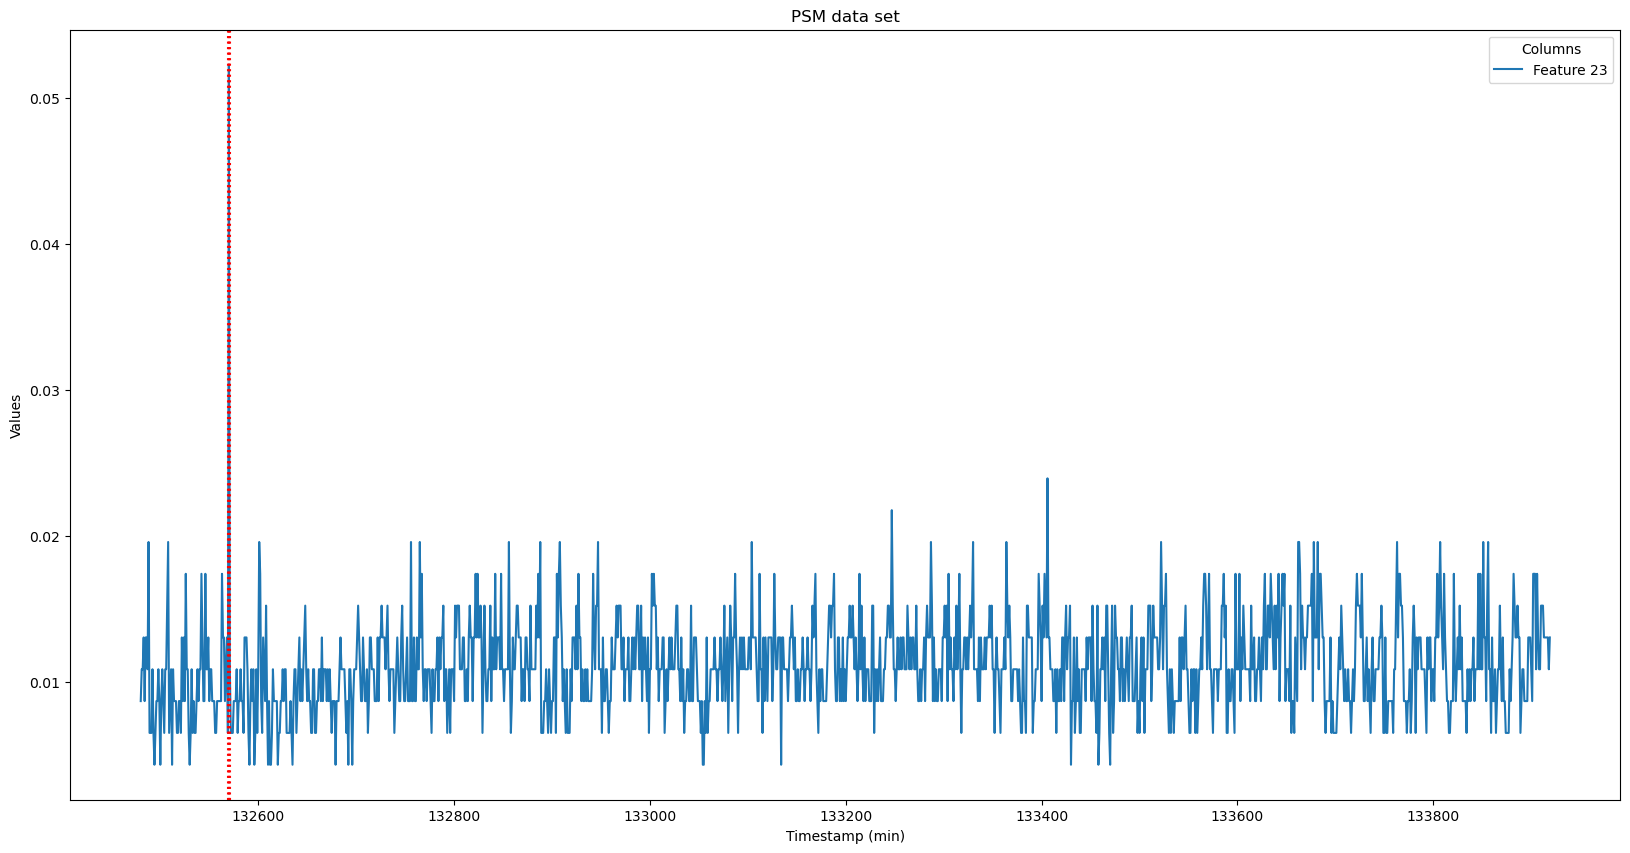

In [11]:
x = 60*24
df_test_subset = df_test.head(x)
df_test_label_subset = df_test_label.head(x)

# Plot the feature
plt.figure(figsize=(20, 10))
plt.plot(df_test_subset['feature_23'], linestyle='-', label='Feature 23')

# Plot a vertical line when the label is 1
for timestamp, label in zip(df_test_label_subset.index, df_test_label_subset['label']):
    if label == 1:
        plt.axvline(x=timestamp, color='red', linestyle=':')

# Customize the plot (optional)
plt.title('PSM data set')
plt.xlabel('Timestamp (min)')
plt.ylabel('Values')
plt.legend(title='Columns')

# Show the plot
plt.show()


# IHEPC

In [8]:
df_ihepc_test = pd.read_csv('./dataset/IHEPC/test.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='Unnamed: 0'
                   )

In [9]:
df_ihepc_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0.101127,0.354155,0.290647,0.354814,0.0,0.531230,0.340249,0.463415,0.0,0.580645
1,0.079120,0.344378,0.228777,0.345417,0.0,0.514639,0.331950,0.475610,0.0,0.580645
2,0.078596,0.344016,0.227338,0.345607,0.0,0.518868,0.331950,0.475610,0.0,0.580645
3,0.073094,0.345645,0.228777,0.346338,0.0,0.535133,0.331950,0.475610,0.0,0.612903
4,0.087765,0.344921,0.225899,0.345929,0.0,0.526025,0.331950,0.463415,0.0,0.580645


In [10]:
df_ihepc_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622577 entries, 0 to 622576
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       622577 non-null  float64
 1   1       622577 non-null  float64
 2   2       622577 non-null  float64
 3   3       622577 non-null  float64
 4   4       622577 non-null  float64
 5   5       622577 non-null  float64
 6   6       622577 non-null  float64
 7   7       622577 non-null  float64
 8   8       622577 non-null  float64
 9   9       622577 non-null  float64
dtypes: float64(10)
memory usage: 52.2 MB


In [74]:
df_ihepc_train = pd.read_csv('./dataset/IHEPC/train.csv', 
                   #parse_dates=['timestamp_(min)'], 
                   #infer_datetime_format=True,
                   #low_memory=False, na_values=['nan','?'],
                   index_col='Unnamed: 0'
                   )

In [75]:
df_ihepc_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0.429657,0.374796,0.300719,0.385954,0.183145,0.378660,0.377593,0.0,0.012821,0.548387
1,0.587372,0.478363,0.313669,0.480985,0.058744,0.339297,0.473029,0.0,0.012821,0.516129
2,0.573487,0.479631,0.358273,0.480279,0.000000,0.328237,0.473029,0.0,0.025641,0.548387
3,0.583181,0.480898,0.361151,0.481214,0.000000,0.342876,0.473029,0.0,0.012821,0.548387
4,0.357611,0.325005,0.379856,0.332018,0.146158,0.405986,0.323651,0.0,0.012821,0.548387


In [76]:
df_ihepc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452682 entries, 0 to 1452681
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1452682 non-null  float64
 1   1       1452682 non-null  float64
 2   2       1452682 non-null  float64
 3   3       1452682 non-null  float64
 4   4       1452682 non-null  float64
 5   5       1452682 non-null  float64
 6   6       1452682 non-null  float64
 7   7       1452682 non-null  float64
 8   8       1452682 non-null  float64
 9   9       1452682 non-null  float64
dtypes: float64(10)
memory usage: 121.9 MB


In [77]:
df_ihepc_train.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06,1.452682e+06
mean,9.354810e-02,9.114392e-02,8.721547e-02,9.518526e-02,1.756922e-01,5.621738e-01,9.135699e-02,1.393787e-02,1.747413e-02,1.947722e-01
std,7.969951e-02,9.856085e-02,7.982386e-02,9.789488e-02,1.850198e-01,1.068966e-01,9.501702e-02,7.613152e-02,7.749536e-02,2.664276e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.846738e-02,1.991671e-02,3.309353e-02,2.571206e-02,0.000000e+00,5.003253e-01,2.489627e-02,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.182866e-02,4.200616e-02,7.194245e-02,4.833489e-02,1.159044e-01,5.702668e-01,4.564315e-02,0.000000e+00,0.000000e+00,3.225806e-02
75%,9.955462e-02,1.303639e-01,1.381295e-01,1.331136e-01,3.290608e-01,6.314249e-01,1.286307e-01,0.000000e+00,1.282051e-02,5.483871e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


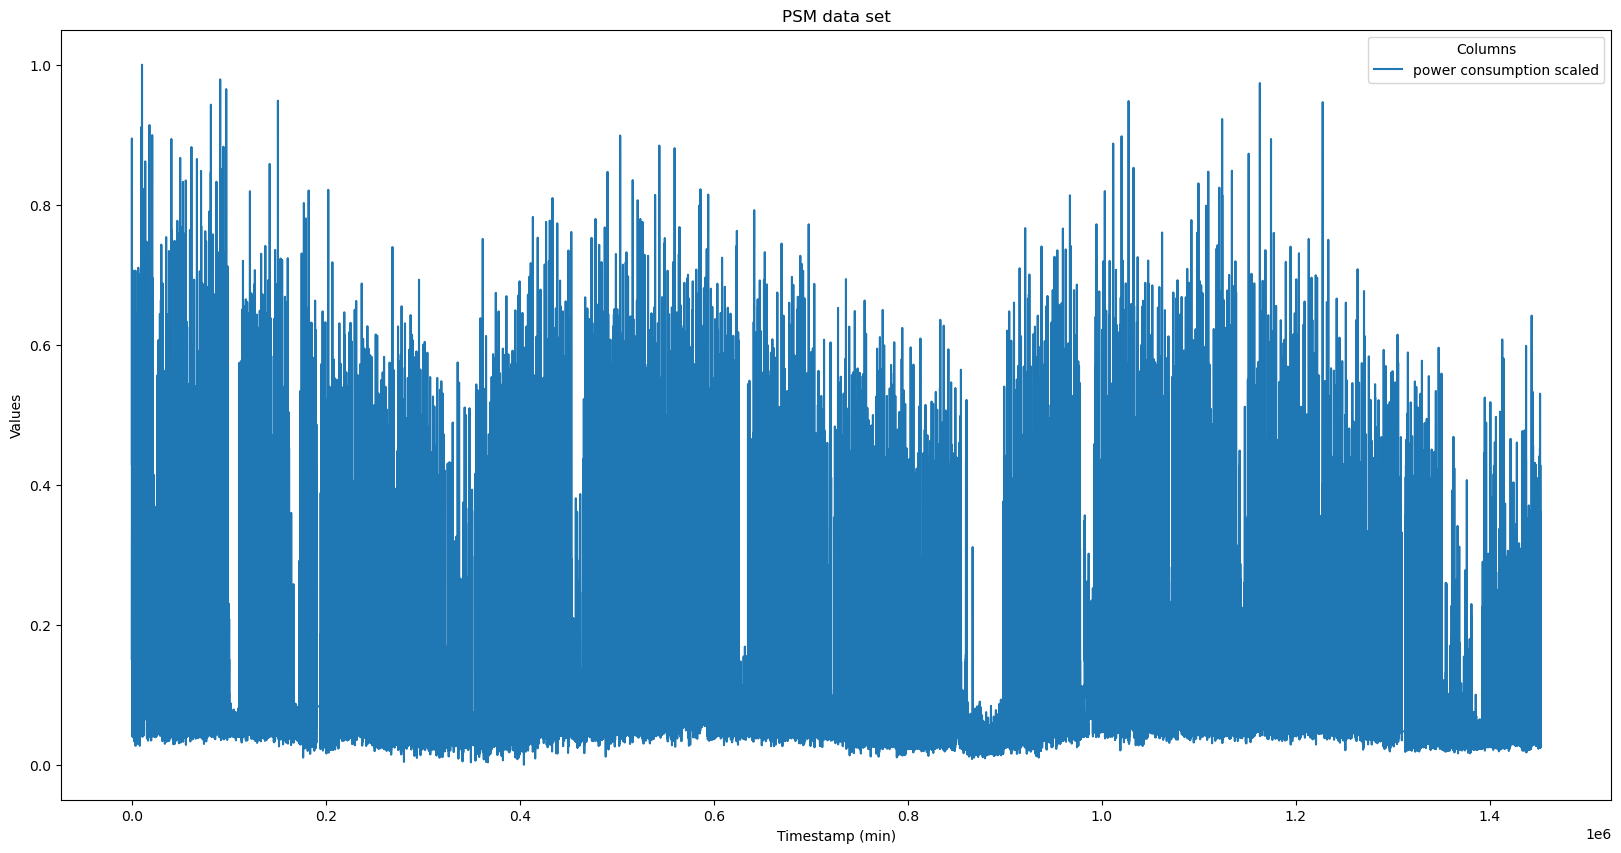

In [81]:
x =  len(df_ihepc_train) #60*24
df_ihepc_train_subset = df_ihepc_train.head(x)



# Plot all columns in one plot
#df_ihepc_train_subset.plot(figsize=(20, 10), linestyle='-')

plt.figure(figsize=(20, 10))
plt.plot(df_ihepc_train_subset['0'], linestyle='-', label='power consumption scaled')


# Customize the plot (optional)
plt.title('PSM data set')
plt.xlabel('Timestamp (min)')
plt.ylabel('Values')
plt.legend(title='Columns')

# Show the plot
plt.show()

# Load PyTorch models

In [12]:
from model.AnomalyTransformer import AnomalyTransformer


model = AnomalyTransformer(win_size=100, enc_in=25, c_out=25)
path =  './checkpoints/PSM_checkpoint.pth'

model.load_state_dict(torch.load(path))
model.eval()

AnomalyTransformer(
  (embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(25, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (attention): AttentionLayer(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (inner_attention): AnomalyAttention(
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (query_projection): Linear(in_features=512, out_features=512, bias=True)
          (key_projection): Linear(in_features=512, out_features=512, bias=True)
          (value_projection): Linear(in_features=512, out_features=512, bias=True)
          (sigma_projection): Linear(in_features=512, out_features=8, bias=True)
          (out_projection): Linear(in_features=512, out_feat

In [34]:
df_train.shape

(132481, 25)

In [14]:
df_test.shape

(87841, 25)

In [22]:
X_test_tensor  = torch.tensor(df_test.values, dtype=torch.float32)

In [28]:
X_test_tensor.size()

torch.Size([87841, 25])

In [36]:
X_test_tensor.dim()

2

In [37]:
torch.permute(X_test_tensor, (1,0)).size()

torch.Size([25, 87841])

In [15]:


# Perform inference
with torch.no_grad():
    predictions = model(X_test_tensor)


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3